[https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/](https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/)

### pandas join(always uses row indices to join columns)
- pandas join() is similar to SQL join where it combines columns from multiple DataFrames based on row indices. 
- In pandas join can be done only on indexes but not on columns.
- By default, it uses left join on the row index.This is unlike merge() where it does inner join on common columns.
- If you wanted to join on columns you should use pandas.merge() method as this by default performs on columns

In [1]:
import pandas as pd

technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Fee' :[20000,25000,22000,30000],
    'Duration':['30days','40days','35days','50days'],
              }
index_labels=['r1','r2','r3','r4']
df1 = pd.DataFrame(technologies,index=index_labels)

technologies2 = {
    'Courses':["Spark","Java","Python","Go"],
    'Discount':[2000,2300,1200,2000]
              }
index_labels2=['r1','r6','r3','r5']
df2 = pd.DataFrame(technologies2,index=index_labels2)

In [2]:
print(df1)
print(df2)

    Courses    Fee Duration
r1    Spark  20000   30days
r2  PySpark  25000   40days
r3   Python  22000   35days
r4   pandas  30000   50days
   Courses  Discount
r1   Spark      2000
r6    Java      2300
r3  Python      1200
r5      Go      2000


In [3]:
df1.join(df2, lsuffix="_left", rsuffix="_right")

,Courses_left,Fee,Duration,Courses_right,Discount
r1,Spark,20000,30days,Spark,2000.0
r2,PySpark,25000,40days,NaN,NaN
r3,Python,22000,35days,Python,1200.0
r4,pandas,30000,50days,NaN,NaN


#### Note:Since we have a common column Courses on both DataFrames we have to specify the lsuffix (left suffix) or rsuffix (right suffix) param, not specifying these you will get an error.

In [4]:
df1.join(df2, lsuffix="_left", rsuffix="_right", how='inner')

,Courses_left,Fee,Duration,Courses_right,Discount
r1,Spark,20000,30days,Spark,2000
r3,Python,22000,35days,Python,1200


In [5]:
df1.join(df2, lsuffix="_left", rsuffix="_right", how='right')

,Courses_left,Fee,Duration,Courses_right,Discount
r1,Spark,20000.0,30days,Spark,2000
r6,NaN,NaN,NaN,Java,2300
r3,Python,22000.0,35days,Python,1200
r5,NaN,NaN,NaN,Go,2000


In [6]:
df1.join(df2, lsuffix="_left", rsuffix="_right", how='outer')

,Courses_left,Fee,Duration,Courses_right,Discount
r1,Spark,20000.0,30days,Spark,2000.0
r2,PySpark,25000.0,40days,NaN,NaN
r3,Python,22000.0,35days,Python,1200.0
r4,pandas,30000.0,50days,NaN,NaN
r5,NaN,NaN,NaN,Go,2000.0
r6,NaN,NaN,NaN,Java,2300.0


#### 7. Pandas Join on Column
- In case if you wanted to join on columns, use pandas.merge() method or set the column you wanted to join on to Index and use it. The below example demonstrates how to set the column to Index in pandas and use it for joining. df1.set_index(‘Courses’) is used to convert column to index

In [7]:
df1.set_index('Courses').join(df2.set_index('Courses'))

,Fee,Duration,Discount
Courses,,,
Spark,20000,30days,2000.0
PySpark,25000,40days,NaN
Python,22000,35days,1200.0
pandas,30000,50days,NaN


In [8]:
df1.set_index('Courses').join(df2.set_index('Courses'), how='inner')

,Fee,Duration,Discount
Courses,,,
Spark,20000,30days,2000
Python,22000,35days,1200


In [9]:
df1.set_index('Courses').join(df2.set_index('Courses'), how='right')

,Fee,Duration,Discount
Courses,,,
Spark,20000.0,30days,2000
Java,NaN,NaN,2300
Python,22000.0,35days,1200
Go,NaN,NaN,2000


In [10]:
df1.set_index('Courses').join(df2.set_index('Courses'), how='outer')

,Fee,Duration,Discount
Courses,,,
Go,NaN,NaN,2000.0
Java,NaN,NaN,2300.0
PySpark,25000.0,40days,NaN
Python,22000.0,35days,1200.0
Spark,20000.0,30days,2000.0
pandas,30000.0,50days,NaN


In [11]:
import pandas as pd

technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Fee' :[20000,25000,22000,30000],
    'Duration':['30days','40days','35days','50days'],
              }
index_labels=['r1','r2','r3','r4']
df1 = pd.DataFrame(technologies,index=index_labels)

technologies2 = {
    'Courses':["Spark","Java","Python","Go"],
    'Discount':[2000,2300,1200,2000]
              }
index_labels2=['r1','r6','r3','r5']
df2 = pd.DataFrame(technologies2,index=index_labels2)

print(df1)
print(df2)

    Courses    Fee Duration
r1    Spark  20000   30days
r2  PySpark  25000   40days
r3   Python  22000   35days
r4   pandas  30000   50days
   Courses  Discount
r1   Spark      2000
r6    Java      2300
r3  Python      1200
r5      Go      2000


In [13]:
# Merge DataFrames on Columns
pd.merge(df1,df2,how='inner', on='Courses')

,Courses,Fee,Duration,Discount
0,Spark,20000,30days,2000
1,Python,22000,35days,1200


In [18]:
pd.merge(df1,df2,how='left', on='Courses')

,Courses,Fee,Duration,Discount
0,Spark,20000,30days,2000.0
1,PySpark,25000,40days,NaN
2,Python,22000,35days,1200.0
3,pandas,30000,50days,NaN


In [19]:
pd.merge(df1,df2,how='right', on='Courses')

,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,2000
1,Python,22000.0,35days,1200
2,Java,NaN,NaN,2300
3,Go,NaN,NaN,2000


In [20]:
pd.merge(df1,df2,how='outer', on='Courses')

,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,2000.0
1,PySpark,25000.0,40days,NaN
2,Python,22000.0,35days,1200.0
3,pandas,30000.0,50days,NaN
4,Java,NaN,NaN,2300.0
5,Go,NaN,NaN,2000.0


In [16]:
# Merge DataFrames on Index
df3 = pd.merge(df1,df2,left_index=True,right_index=True)
df3

,Courses_x,Fee,Duration,Courses_y,Discount
r1,Spark,20000,30days,Spark,2000
r3,Python,22000,35days,Python,1200


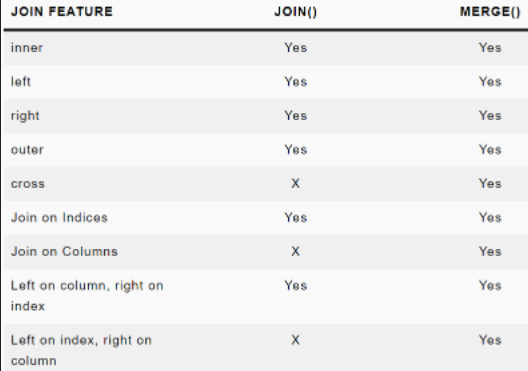

In [22]:
from IPython.display import Image
Image("E:/code/5.DataAnalysisOfficial/img/joins.png")